## Step 5 - Evaluate Model - Task 3 - Evaluate Forecasting


###Load Libraries


In [1]:
!pip install statsmodels --upgrade

In [2]:
import pandas as pd

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Set up environment and connect to Google Drive

In [3]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

In [4]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

## EM3.1 Open Notebook titled “Step-5-Task-3-Evaluate-Forecasting” and upload the state 

### Upload State level Data


In [5]:
if using_Google_colab:             
    df_abt_by_state = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_Mac_or_Linux:
    df_abt_by_state = pd.read_csv('../output/abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
if using_Anaconda_on_windows:
    df_abt_by_state = pd.read_csv('..\output\abt_by_state.csv',
                                  index_col=['Date'], parse_dates=['Date'])
df_abt_by_state

,Unnamed: 0,State,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,,
2020-01-22,0,AL,1,0,NaN,NaN,0,NaN,NaN
2020-01-23,1,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-24,2,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-25,3,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-26,4,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-27,5,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-28,6,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-29,7,AL,1,0,0.0,0.000000,0,0.0,0.000000
2020-01-30,8,AL,1,0,0.0,0.000000,0,0.0,0.000000


###Filter Data to a specific state (e.g., NJ)

In [6]:
df_abt_chosen_state = df_abt_by_state[df_abt_by_state['State'] == 'NJ']
df_abt_chosen_state = df_abt_chosen_state.dropna()
df_abt_chosen_state

,Unnamed: 0,State,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,,
2020-01-29,8357,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-01-30,8358,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-01-31,8359,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-01,8360,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-02,8361,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-03,8362,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-04,8363,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-05,8364,NJ,34,0,0.0,0.000000,0,0.0,0.000000
2020-02-06,8365,NJ,34,0,0.0,0.000000,0,0.0,0.000000


### Compute Weekly Summaries

In [7]:
df_abt_chosen_state_weekly = df_abt_chosen_state.resample('W').sum()
df_abt_chosen_state_weekly


,Unnamed: 0,stateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-02-02,41795,170,0,0.0,0.000000,0,0.0,0.000000
2020-02-09,58555,238,0,0.0,0.000000,0,0.0,0.000000
2020-02-16,58604,238,0,0.0,0.000000,0,0.0,0.000000
2020-02-23,58653,238,0,0.0,0.000000,0,0.0,0.000000
2020-03-01,58702,238,0,0.0,0.000000,0,0.0,0.000000
2020-03-08,58751,238,13,5.0,1.857143,0,0.0,0.000000
2020-03-15,58800,238,310,93.0,42.428571,8,2.0,1.142857
2020-03-22,58849,238,5733,1816.0,774.714286,71,22.0,9.000000
2020-03-29,58898,238,50306,11472.0,6367.571429,622,137.0,78.714286


### Normalize data

In [8]:
state_covid_cases = df_abt_chosen_state_weekly['Incremental Cases']
cases_max = state_covid_cases.max()
state_covid_cases = state_covid_cases/cases_max


In [9]:
sd =seasonal_decompose(state_covid_cases,freq=7)

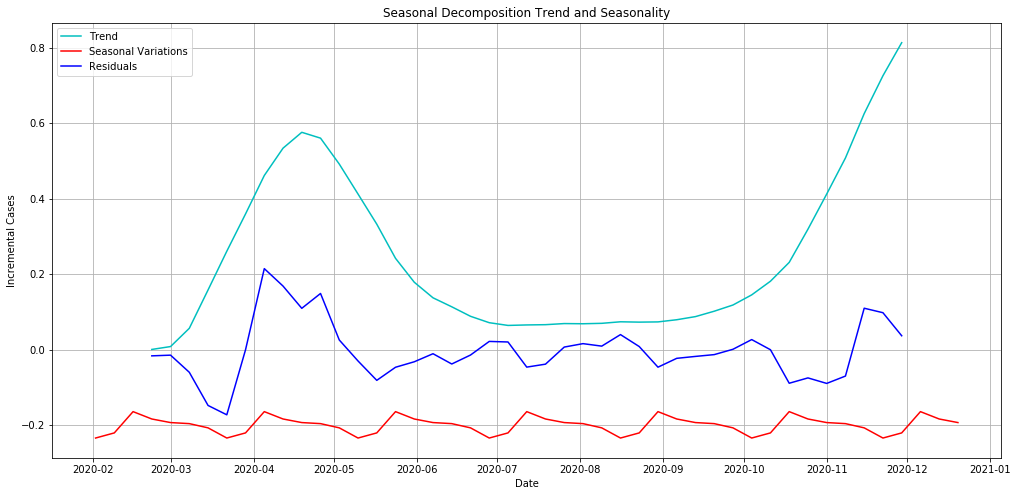

In [10]:
plt.figure(figsize=(17,8))
plt.title('Seasonal Decomposition Trend and Seasonality')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(sd.trend, 'c', label='Trend')
plt.plot(sd.seasonal - 0.2, 'r', label="Seasonal Variations")
plt.plot(sd.resid, 'b', label='Residuals')
plt.legend(loc='best')
plt.grid(True)
plt.show()

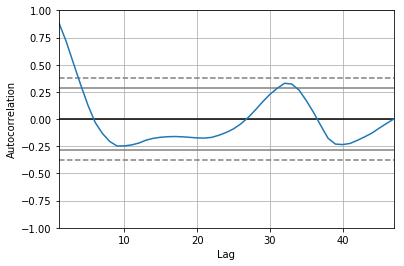

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(state_covid_cases)
plt.show()

## EM3.2 Prepare the model for ARIMA by dividing the data into train and test and run ARIMA model on train dataset


### Divide into training and test sets


In [12]:
train = state_covid_cases[:'2020-11-1']
test  = state_covid_cases['2020-11-2':]

In [13]:
test.shape

(7,)

### ARIMA Model


                              ARIMA Model Results                              
Dep. Variable:     D.Incremental Cases   No. Observations:                   39
Model:                  ARIMA(4, 1, 2)   Log Likelihood                  48.605
Method:                        css-mle   S.D. of innovations              0.066
Date:                 Sat, 20 Mar 2021   AIC                            -81.211
Time:                         16:33:54   BIC                            -67.902
Sample:                     02-09-2020   HQIC                           -76.436
                          - 11-01-2020                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0068      0.020      0.346      0.729      -0.032       0.045
ar.L1.D.Incremental Cases     1.1875      0.173      6.863      0.000       0.

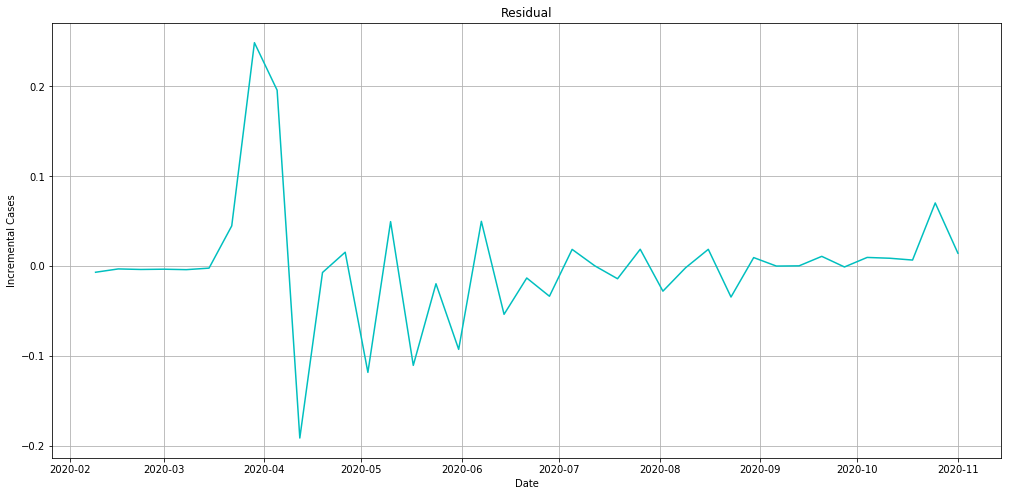

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train, order=(4,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(17,8))
plt.title('Residual')
plt.ylabel('Incremental Cases')
plt.xlabel('Date')
plt.plot(residuals, 'c', label='Residuals')
plt.grid(True)
plt.show()
#residuals.plot()
#residuals.plot(kind='kde')
#plt.show()
#print(residuals.describe())

## EM3.3		Test ARIMA Results on test cases and plot results

predicted=0.353727, expected=0.441449
predicted=0.524096, expected=0.727509
predicted=0.921206, expected=0.788980
predicted=0.765234, expected=0.829066
predicted=0.903941, expected=1.000000
predicted=1.050873, expected=0.962598
predicted=0.894907, expected=0.942186
Test MSE: 0.013


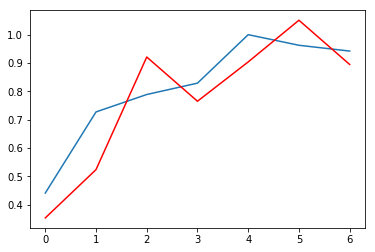

In [15]:
train_m = train.values
test_m = test.values
history = [x for x in train_m]
predictions = []
for t in range(len(test_m)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_m[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test_m)
plt.plot(predictions, color='red')
plt.show()

In [16]:
print("Number of test cases: ", len(test_m))
print("Index \t Observation")
for t in range(2,len(test_m)):
  observation = test_m[t]
  print(t, "\t", observation)

Number of test cases:  7
Index 	 Observation
2 	 0.7889800011798714
3 	 0.8290661317916347
4 	 1.0
5 	 0.9625980768096277
6 	 0.9421863016931155
